# Log Parser of training #

Test with kws20.py with %66 augment chance for each augmentation.

+ Loss vs epoch plot
+ Acc vs epoch plot

In [1]:
import re
import matplotlib.pyplot as plt
import log_parser
import seaborn as sns
import numpy as np

In [ ]:
# Regular expressions to extract relevant information
epoch_pattern = re.compile(r'Epoch: \[(\d+)\]')
loss_pattern = re.compile(r'Overall Loss (\d+\.\d+)')
validation_loss_pattern = re.compile(r']    Loss\s*([\d.]+)')
top1_pattern = re.compile(r'Best \[Top1: \s*([\d.]+)')


In [ ]:
# Open and read the log file
with open('/home/emretopcu/ai8x-training/logs/train_strategy_c_upd_utt_v1/2023.09.20-170138.log', 'r') as log_file:
    log_contents = log_file.read()
    

In [ ]:
epoch_matches = re.findall(epoch_pattern, log_contents)
loss_matches = re.findall(loss_pattern, log_contents)
validation_loss_matches = re.findall(validation_loss_pattern, log_contents)
top1_matches = re.findall(top1_pattern, log_contents)


In [ ]:
# Convert extracted data to appropriate data types
epochs = [int(match) for match in epoch_matches]
losses = [float(match) for match in loss_matches]
validation_losses = [float(match) for match in validation_loss_matches]
top1_accuracies = [float(match) for match in top1_matches]


In [ ]:
n_epochs = np.linspace(0,epochs[-1],epochs[-1] + 1)

In [ ]:
def last_loss(loss,n_epochs,n_batch):
    
    n = 200
    last_loss = np.zeros(n)
    cnt = 0

    for i in range(len(loss)):
        if (i+1) % n_batch == 0:
            last_loss[cnt] = loss[i]
            cnt += 1
    return last_loss

In [ ]:
def avg_loss(loss,n_epochs,n_batch):

    total_loss = 0
    n = 200
    avg_loss = np.zeros(n)
    cnt = 0

    for i in range(len(loss)):
        total_loss += loss[i]
        
        if (i+1) % n_batch == 0:
            avg_loss[cnt] = total_loss / n_batch
            cnt += 1
            total_loss = 0
    return avg_loss

In [ ]:
test_losses = validation_losses[1000:]
validation_losses.pop()

In [ ]:
len(test_losses)

In [ ]:
avg_val_losses = avg_loss(validation_losses, n_epochs, 5)
avg_losses = avg_loss(losses, n_epochs, 41)

In [ ]:
avg_val_losses = last_loss(validation_losses, n_epochs, 5)
avg_losses = last_loss(losses, n_epochs, 41)

In [ ]:
print(avg_losses)

In [ ]:
print(len(avg_val_losses), len(avg_losses))

In [ ]:
print(len(n_epochs))
print(len(avg_losses))
print(len(avg_val_losses))
print(len(top1_accuracies))

In [ ]:
# Make sure training and validation losses have the same length
#min_length = min(len(losses), len(validation_losses))
#epochs = epochs[:min_length]
#training_losses = losses[:min_length]
#validation_losses = validation_losses[:min_length]
#top1_accuracies = top1_accuracies[:min_length]

In [ ]:
# Plotting
plt.plot(n_epochs, avg_losses, label='Training Loss')
plt.plot(n_epochs, avg_val_losses, label='Validation Loss',color="r")
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs of Strategy C')
plt.grid(True)
plt.show()

In [ ]:
#top_length = min(len(epochs), len(top1_accuracies))
#top_1epochs = epochs[:top_length]
#top1_accuracies = top1_accuracies[:top_length]

In [ ]:
print(top1_accuracies[65:100])

In [ ]:
# Plotting
plt.plot(n_epochs, top1_accuracies, label='Top-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Top-1 Accuracy (%)')
plt.title('Top-1 Accuracy vs Epoch of Strategy C')
plt.grid(True)
plt.legend()
plt.show()

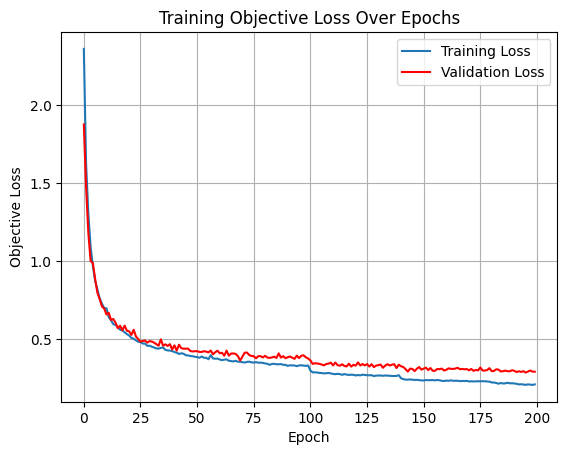

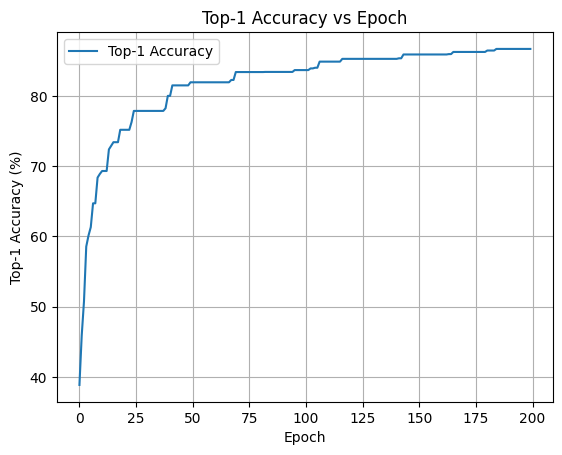

0

In [2]:
log_path = '/home/emretopcu/ai8x-training/logs/train_strategy_c_upd_utt_v1/2023.09.20-170138.log'
log_parser.log_parser(log_path)